<center>
Открытый курс по машинному обучению. Сессия № 3
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы.**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 
---


Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 


---


Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 

---


Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)


---


Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра. 

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://stepik.org/media/attachments/course/57984/train.csv", 
                 sep=';',
                 index_col='id')

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1.</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).**

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин

In [5]:
# Ваш код здесь
print("{0} {1} и {2} {3}".format(
    df[df['gender'] == 1]['height'].count(),
    "женщин" if df[df['gender'] == 1]['height'].mean() < df[df['gender'] == 2]['height'].mean() else "мужчин",
    df[df['gender'] == 2]['height'].count(),
    "женщин" if df[df['gender'] == 1]['height'].mean() > df[df['gender'] == 2]['height'].mean() else "мужчин"
))


45530 женщин и 24470 мужчин


**<font color='red'>Вопрос 2.</font> Кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- мужчины 
- женщины

In [6]:
# Ваш код здесь
print("женщины" if df[df['gender'] == 1]['alco'].mean() > df[df['gender'] == 2]['alco'].mean() else "мужчины")

мужчины


**<font color='red'>Вопрос 3.</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [7]:
# Ваш код здесь
round((df[df['gender'] == 2]['smoke'].mean() * 100) / (df[df['gender'] == 1]['smoke'].mean() * 100))


12

**<font color='red'>Вопрос 4.</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются средние значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 10
- 15
- 20
- 25

In [8]:
# Ваш код здесь
round((df[df['smoke'] == 0]['age'].median() - df[df['smoke'] == 1]['age'].median()) / 365.25 * 12)


20

**<font color='red'>Вопрос 5.</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='https://habrastorage.org/webt/gg/38/vf/gg38vfl5ql8obqjmlsvt9es76p8.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 


---


Уточнения:
- Создайте новый признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей (согласно целевому признаку, `cardio`) в этих двух подвыборках? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [17]:
# Ваш код здесь
df['age_years'] = round(df['age'] / 365) 

subdf = df[(df['age_years'] >= 60) & (df['age_years'] <= 64)]

a, b = subdf[(subdf['ap_hi'] < 120) & (subdf['cholesterol'] == 1)].shape
c, d = subdf[(subdf['ap_hi'] >= 160) & (subdf['ap_hi'] < 180) & (subdf['cholesterol'] == 3)].shape
a//c

4

**<font color='red'>Вопрос 6.</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке превышает норму
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

In [10]:
# Ваш код здесь
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
print(
     df['BMI'].median() >= 18.5 and df['BMI'].median() <= 25, "- "
    "Медианный BMI по выборке лежит в пределах нормы", 
)

print(
     df[df['gender'] == 1]['BMI'].mean() > df[df['gender'] == 2]['BMI'].mean(), "- "
    "У женщин в среднем BMI выше, чем у мужчин", 
)

print(
    df[df['cardio'] == 0]['BMI'].mean() > df[df['cardio'] == 1]['BMI'].mean(), "- "
    "У здоровых в среднем BMI выше, чем у больных"
)

subdf = df[(df['alco'] == 0) & (df['cardio'] == 0)]
print(
    (subdf[subdf['gender'] == 2]['BMI'].mean()) < (subdf[subdf['gender'] == 1]['BMI'].mean()), "- "
    "В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин"
)

False - Медианный BMI по выборке лежит в пределах нормы
True - У женщин в среднем BMI выше, чем у мужчин
False - У здоровых в среднем BMI выше, чем у больных
True - В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин


**<font color='red'>Вопрос 7.</font> Cколько процентов (округленно, round) людей, отметивших, что они и курят, и пьют, занимаются физической активностью?**

**<font color='red'>Утверждения:</font>**
- 85
- 87
- 3
- 15

In [11]:
import math

In [12]:
# Ваш код здесь
n = df['gender'].count()
m = (df[df['smoke'] == 1][df['alco'] == 1][df['active'] == 1]).count()*100/n
math.ceil(m[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


3

**<font color='red'>График.</font> Изобразите на одном графике распределение по возрасту (в годах) в виде bar chart и количество людей с сердечно-сосудистыми заболеваниями в этих возрастных категориях**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


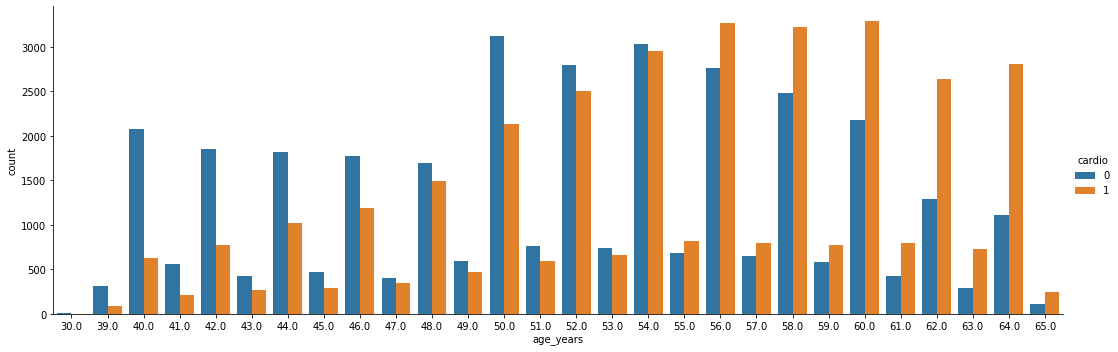

In [22]:
# Ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

df['age_years'] = round(df['age'] / 365) 
sns.catplot('age_years', hue='cardio', data=df, kind='count', height = 5, aspect = 3)